In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Load and Inspect Data

In [82]:
df = pd.read_csv('data/GlobalPowerPlantDB.csv')
df.head()

C:\Users\erand\AppData\Local\Temp\ipykernel_7332\1312117121.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/GlobalPowerPlantDB.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


insights
- data look fairly clean

- can build multiple modeling targets
                -       classification - predict primary_fuel
                -       Regression - predict capacity_mw or yearly energy generation

2. Data Structure Overview

In [83]:
# inspect dataset size, rows, columns
df.shape

(34936, 36)

Insights
-   34,936 rows → a good-sized dataset for modeling

-   36 columns → fairly wide, may need feature selection later

In [84]:
# dataset column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [85]:
# dataset missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

Insights

-   capacity_mw, latitude, longitude, primary_fuel	|   Fully filled     |   Great for modeling

-   other_fuel1/2/3                                 |	Many nulls       |   Might be dropped or turned into binary flags like is_multi_fuel

-   commissioning_year, owner, wepp_id	            |   50%+ missing      |   Be cautious, might impute or drop

-   generation_gwh_2013–2019	                    |   Mostly nulls     |   Too sparse for modeling — maybe only use average or estimated generation if needed

-   estimated_generation_gwh_2013–2017	            |   Fully filled     |   Likely more reliable for modeling than the raw ones

-   estimated_generation_note_...	                |   But repetitive   |   Could drop, unless you want to explore modeling generation quality

Key Insight

-   Clean core variables: location, capacity, fuel type

-   Optional but incomplete extras: generation data, commissioning year

-   Sparse or repetitive info: estimation notes, owner, etc.

-   core modeling dataset - ['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel','commissioning_year', 'estimated_generation_gwh_2013–2017']

In [86]:
# Summary Stats (numeric)
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


Insights

-   capacity_mw – How powerful is the power plant
        -   Mean: ~163 MW — like the average car horsepower in the energy world.

        -   Min: 1 MW – tiny, maybe a small solar farm.

        -   Max: 22,500 MW – a monster power station!

        -   Skewed right: Huge power plants are rare but pull the average up.
        This may need a log transformation during modeling to reduce skewness.

-  latitude, longitude – Where on Earth?
        -   Ranges from -77 to +71 lat, and -180 to +180 lon — this covers global plants.

        -   You could cluster by region or extract:

        -   continent

        -   climate zone (hot/cold)

        -   distance to equator (affects solar potential)

In [87]:
# Summary Stats (categorical)
df.describe(include='object')

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,other_fuel3,owner,source,url,geolocation_source,wepp_id,generation_data_source,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
count,34936,34936,34936,34936,34936,1944,276,92,20868,34921,34918,34517,16234,11400,34936,34936,34936,34936,34936
unique,167,167,34528,34936,15,12,11,8,10144,866,4870,28,15263,17,5,5,5,5,6
top,USA,United States of America,Santo Antônio,GEODB0003803,Solar,Oil,Gas,Gas,Cypress Creek Renewables,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,1082676,U.S. Energy Information Administration,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
freq,9833,9833,6,1,10665,1169,100,31,185,9789,9789,9789,14,9715,18816,18433,17886,17366,14942


3. Check for Missing Values

-   country	167	Data spans the whole world 

-   primary_fuel	15	Multiple types: Solar, Coal, Wind, Hydro, etc

-   owner	10,144	Real-world complexity: many operators

-   estimated_generation_note_2017	6	Could be useful to understand estimation method quality

In [88]:
df.shape[0]

34936

In [89]:
(df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100

other_fuel3                       99.736661
other_fuel2                       99.209984
other_fuel1                       94.435539
generation_gwh_2013               81.632127
generation_gwh_2014               79.316464
generation_gwh_2015               76.519922
generation_gwh_2016               73.826425
generation_gwh_2017               72.807419
generation_gwh_2018               72.415274
generation_gwh_2019               72.352301
generation_data_source            67.368903
year_of_capacity_data             57.387795
estimated_generation_gwh_2013     53.858484
wepp_id                           53.532173
estimated_generation_gwh_2014     52.762194
estimated_generation_gwh_2015     51.196474
commissioning_year                50.060110
estimated_generation_gwh_2016     49.708038
owner                             40.267918
estimated_generation_gwh_2017      5.146554
geolocation_source                 1.199336
url                                0.051523
source                          

In [90]:
# Impute commissioning_year
df['commissioning_year'] = df.groupby('primary_fuel')['commissioning_year'].transform(lambda x: x.fillna(x.median()))

c:\Users\erand\anaconda3\envs\study\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


4. Basic Value Counts

In [91]:
df['primary_fuel'].value_counts()

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

In [92]:
df['country'].value_counts().head(10)

country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
IND    1589
DEU    1309
CAN    1159
ESP     829
RUS     545
Name: count, dtype: int64

Insights
- ountry imbalance — useful to stratify or filter by country for deeper insights

5. Categorical vs Numerical Features

In [93]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

In [94]:
print("Categorical:", list(cat_cols))

Categorical: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']


In [95]:
print("Numerical:", list(num_cols))

Numerical: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']


6. Univariate Plots (Distributions)

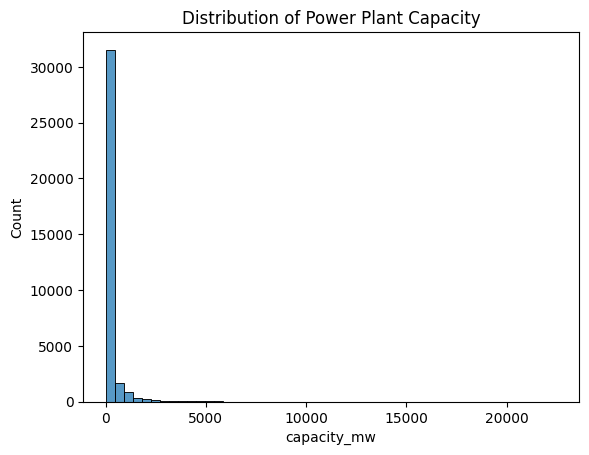

In [96]:
sns.histplot(df['capacity_mw'], bins=50)
plt.title('Distribution of Power Plant Capacity')
plt.show()

-   Highly right-skewed distribution:
        -   Most power plants have small capacities, while a few have extremely high values (up to 22,500 MW).

-   Visual Insight:
        -   Over 90% of plants are clustered on the left end (under ~1000 MW), suggesting the need for transformation (like log scaling) for modeling or clearer visualization.

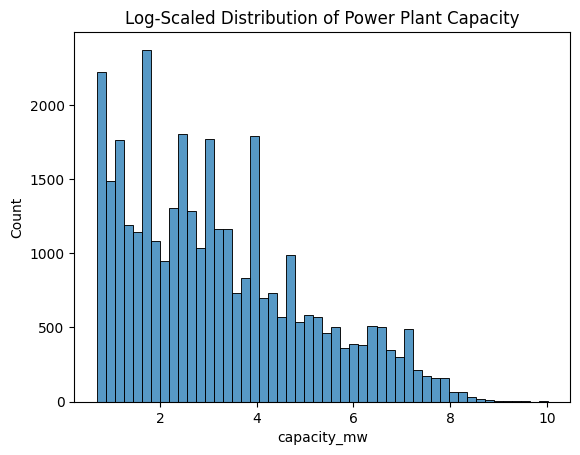

In [97]:
sns.histplot(np.log1p(df['capacity_mw']), bins=50)
plt.title('Log-Scaled Distribution of Power Plant Capacity')
plt.show()

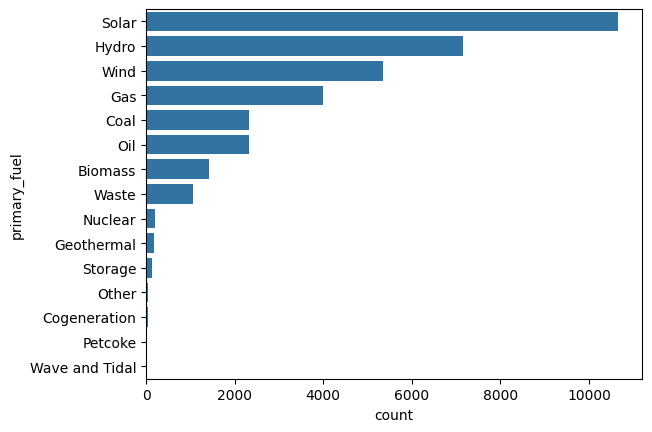

In [98]:
sns.countplot(data=df, y='primary_fuel', order=df['primary_fuel'].value_counts().index)
plt.show()

7. Bivariate (Target vs Feature)

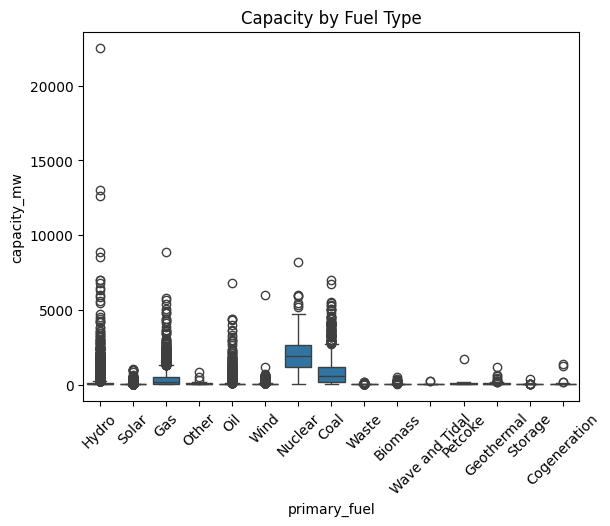

In [99]:
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.title('Capacity by Fuel Type')
plt.xticks(rotation=45)
plt.show()

Insights
-   country has 167 unique values — USA dominates with nearly 10k entries.

-   primary_fuel has 15 categories, but most capacity is focused on a few key fuels (Hydro, Gas, Coal, etc)

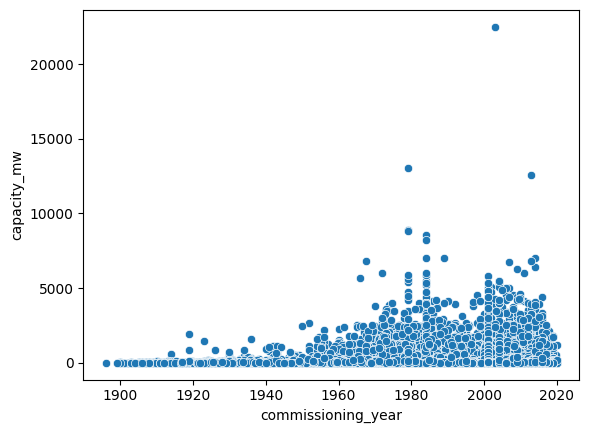

In [100]:
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw')
plt.show()

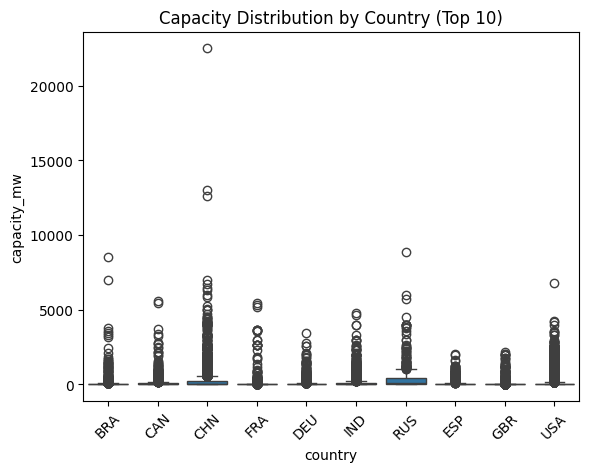

In [101]:
top_countries = df['country'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='capacity_mw')
plt.title('Capacity Distribution by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()


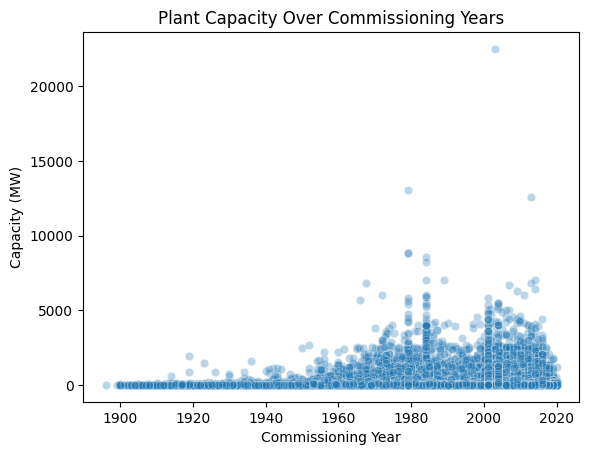

In [102]:
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw', alpha=0.3)
plt.title('Plant Capacity Over Commissioning Years')
plt.ylabel('Capacity (MW)')
plt.xlabel('Commissioning Year')
plt.show()


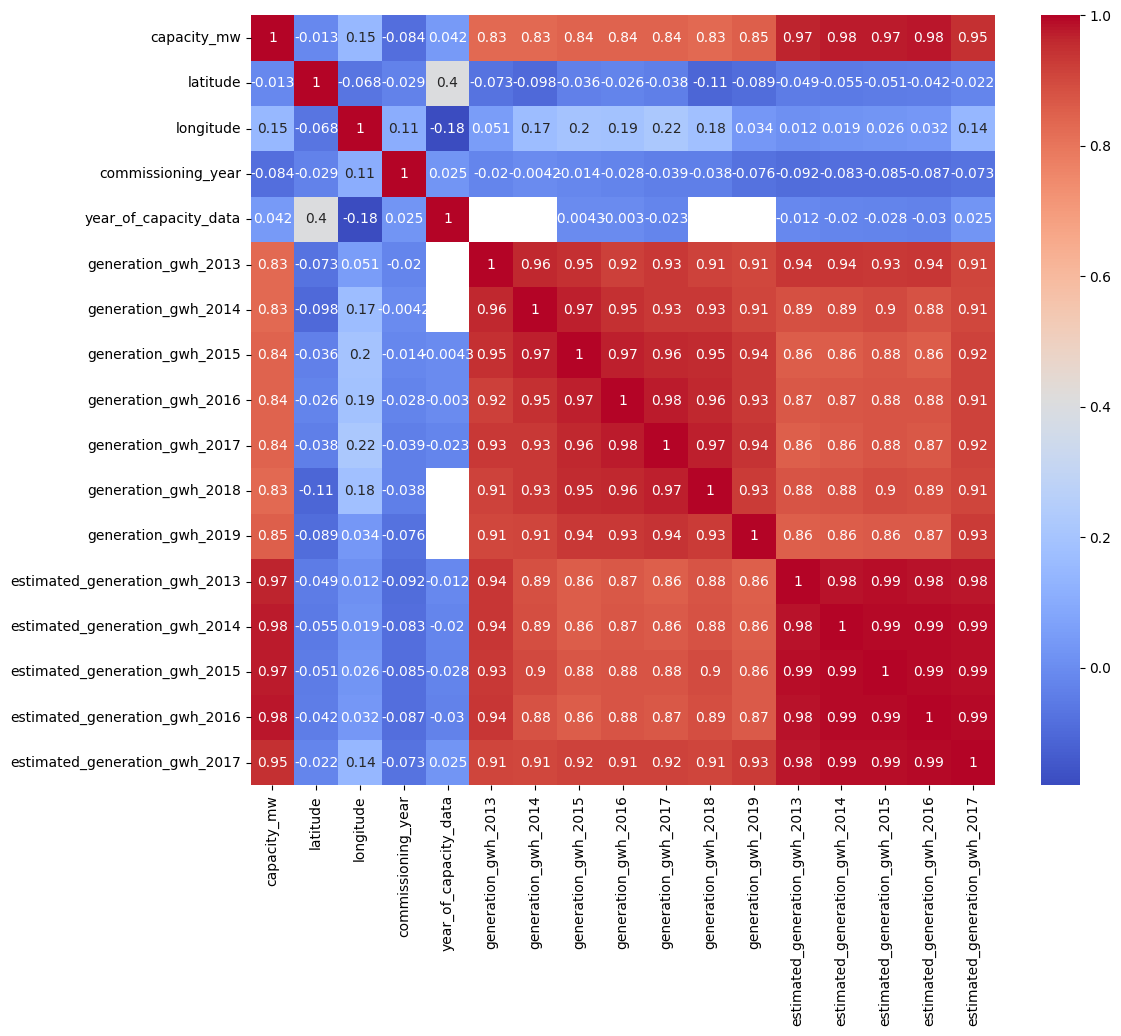

In [103]:
# correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

8. Missing Value Handling

- Categorical: Fill with "Unknown" or "None" (depending on meaning)

In [104]:
# 1. Fill categorical with 'Unknown'
categorical_cols = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 
                    'url', 'geolocation_source', 'generation_data_source']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[categorical_cols]

,other_fuel1,other_fuel2,other_fuel3,owner,source,url,geolocation_source,generation_data_source
0,Unknown,Unknown,Unknown,Unknown,GEODB,http://globalenergyobservatory.org,GEODB,Unknown
1,Unknown,Unknown,Unknown,Unknown,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,Unknown
2,Unknown,Unknown,Unknown,Unknown,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,Unknown
3,Unknown,Unknown,Unknown,Unknown,GEODB,http://globalenergyobservatory.org,GEODB,Unknown
4,Unknown,Unknown,Unknown,Unknown,GEODB,http://globalenergyobservatory.org,GEODB,Unknown
...,...,...,...,...,...,...,...,...
34931,Unknown,Unknown,Unknown,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,Unknown
34932,Unknown,Unknown,Unknown,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,Unknown
34933,Unknown,Unknown,Unknown,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,Unknown
34934,Unknown,Unknown,Unknown,Unknown,GEODB,http://globalenergyobservatory.org,GEODB,Unknown


-   Numerical:

-   If missing due to unrecorded data (e.g., generation), use median or regression-based imputation.

-   If it's truly "not applicable" (e.g., some plants may not have other_fuel3), consider filling with 0 or keeping as NaN and flagging it.

In [105]:
# 2. Fill numerical columns with median
num_cols_to_impute = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                    'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 
                    'generation_gwh_2019', 'capacity_mw']
for col in num_cols_to_impute:
    df[col] = df[col].fillna(df[col].median())

9. Handling Outliers

-   capacity_mw and generation_* are highly right-skewed

-   Log-transform for visualization/modeling.

-   Optionally, cap outliers (winsorization).

In [106]:
# Add log-transformed capacity
df['log_capacity_mw'] = np.log1p(df['capacity_mw'])


In [107]:
# Optional: cap extreme values above 99th percentile
cap = df['capacity_mw'].quantile(0.99)
df['capacity_mw_capped'] = np.where(df['capacity_mw'] > cap, cap, df['capacity_mw'])

10. Convert Dtypes to proper Dtypes

In [108]:
cat_convert = ['country', 'primary_fuel', 'owner', 'geolocation_source', 'generation_data_source']

for col in cat_convert:
    df[col] = df[col].astype('category')


In [109]:
df['country'].dtype

CategoricalDtype(categories=['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATA', 'AUS',
                  'AUT', 'AZE',
                  ...
                  'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'YEM', 'ZAF',
                  'ZMB', 'ZWE'],
, ordered=False, categories_dtype=object)

11. create summary statics table

In [110]:
summary_stats = df.describe().T
summary_stats['missing'] = df.isnull().sum()
summary_stats['dtype'] = df.dtypes
summary_stats.head(10)

,count,mean,std,min,25%,50%,75%,max,missing,dtype
capacity_mw,34936.0,163.355148,489.636072,1.0000,4.900000,16.745000,75.344250,22500.0000,0,float64
latitude,34936.0,32.816637,22.638603,-77.8470,29.256475,39.727750,46.263125,71.2920,0,float64
longitude,34936.0,-6.972803,78.405850,-179.9777,-77.641550,-2.127100,49.502675,179.3887,0,float64
commissioning_year,34926.0,2001.234247,19.582889,1896.0000,1993.907685,2010.000000,2016.000000,2020.0000,10,float64
year_of_capacity_data,14887.0,2018.218849,1.606428,2000.0000,2017.000000,2019.000000,2019.000000,2019.0000,20049,float64
generation_gwh_2013,34936.0,127.988808,957.739058,-947.6000,23.426000,23.426000,23.426000,50834.0000,0,float64
generation_gwh_2014,34936.0,154.588104,1046.708882,-989.6190,23.608500,23.608500,23.608500,32320.9170,0,float64
generation_gwh_2015,34936.0,199.008635,1266.608895,-864.4280,26.142000,26.142000,26.142000,37433.6070,0,float64
generation_gwh_2016,34936.0,198.005249,1264.941568,-768.6200,22.462389,22.462389,22.462389,32377.4770,0,float64
generation_gwh_2017,34936.0,192.985207,1268.250339,-934.9440,17.876500,17.876500,17.876500,36448.6430,0,float64


11. check target correlation

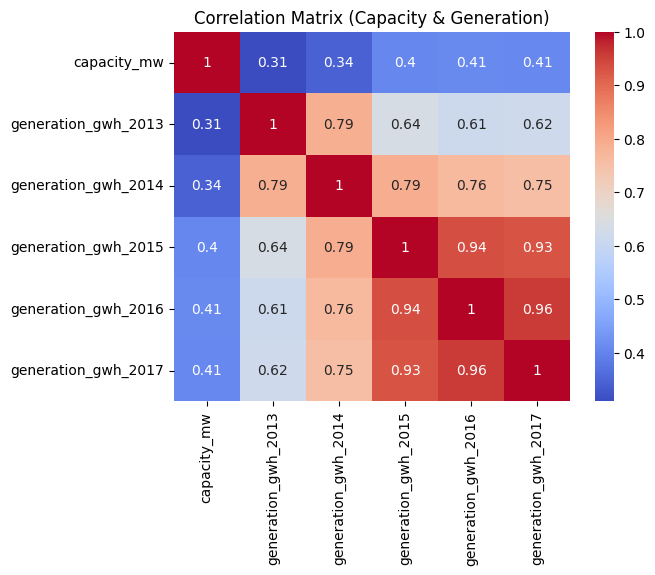

In [111]:
# Correlation matrix for generation + capacity
corr_cols = ['capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014',
            'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Capacity & Generation)")
plt.show()


Feature Engineering

12. Create Age of Power Plant

In [112]:
# Create feature: plant age
df['plant_age'] = 2024 - df['commissioning_year']
df['plant_age'] = df['plant_age'].fillna(df['plant_age'].median())  # handle NaNs

13.  Multi-fuel Flag

In [113]:
# Flag if any other_fuel is present
df['multi_fuel'] = df[['other_fuel1', 'other_fuel2', 'other_fuel3']].notna().sum(axis=1) > 0
df['multi_fuel'] = df['multi_fuel'].astype(int)  # 1 = yes, 0 = no

14 .Continent from Country

In [114]:
# You need country-to-continent mapping (use pycountry_convert or manual map)
continent_map = {
    'USA': 'North America', 'CHN': 'Asia', 'IND': 'Asia', 'GBR': 'Europe', 'FRA': 'Europe',
    'BRA': 'South America', 'DEU': 'Europe', 'CAN': 'North America', 'ESP': 'Europe', 'RUS': 'Europe',
    # ... add more
}
df['continent'] = df['country'].map(continent_map)

15. Generation Ratios

In [115]:
# Efficiency-like feature
df['gen_efficiency_2017'] = df['generation_gwh_2017'] / (df['capacity_mw'] + 1e-3)


 Log Transformed Features

In [116]:
df['log_capacity_mw'] = np.log1p(df['capacity_mw'])
df['log_generation_2017'] = np.log1p(df['generation_gwh_2017'])

c:\Users\erand\anaconda3\envs\study\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


16. encode categorical features

In [117]:
categorical_features = ['primary_fuel', 'country', 'continent', 'geolocation_source', 'generation_data_source']


16. Drop itrelavant or Redundant Columns

In [118]:
cols_to_drop = [
    'name', 'gppd_idnr', 'owner', 'source', 'url',
    'wepp_id', 'estimated_generation_note_2013', 'estimated_generation_note_2014',
    'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017'
]

df.drop(columns=cols_to_drop, inplace=True)


17.Handle Missing Values

In [119]:
# Fill remaining numerical NaNs with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical NaNs with mode
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


18. Encode Categorical Variables

In [120]:
# One-hot encode selected categoricals
encode_cols = ['primary_fuel', 'country', 'continent', 'geolocation_source', 'generation_data_source']
df_encoded = pd.get_dummies(df, columns=encode_cols, drop_first=True)


In [121]:
df.drop(columns=['country_long', 'other_fuel2', 'other_fuel3'], inplace=True)


In [126]:
df['other_fuel1'] = df['other_fuel1'].fillna('Unknown')
df['continent'] = df['continent'].fillna('Unknown')


In [127]:
df_encoded = pd.get_dummies(df, drop_first=True)

19. Select Features and Define Target

In [128]:
X = df_encoded.drop(columns=['capacity_mw', 'log_capacity_mw'])  # drop original + log if modeling log
y = df_encoded['log_capacity_mw']  # target is log-transformed

20. Train-Test Split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


21. Feature Importance Preview (Optional)

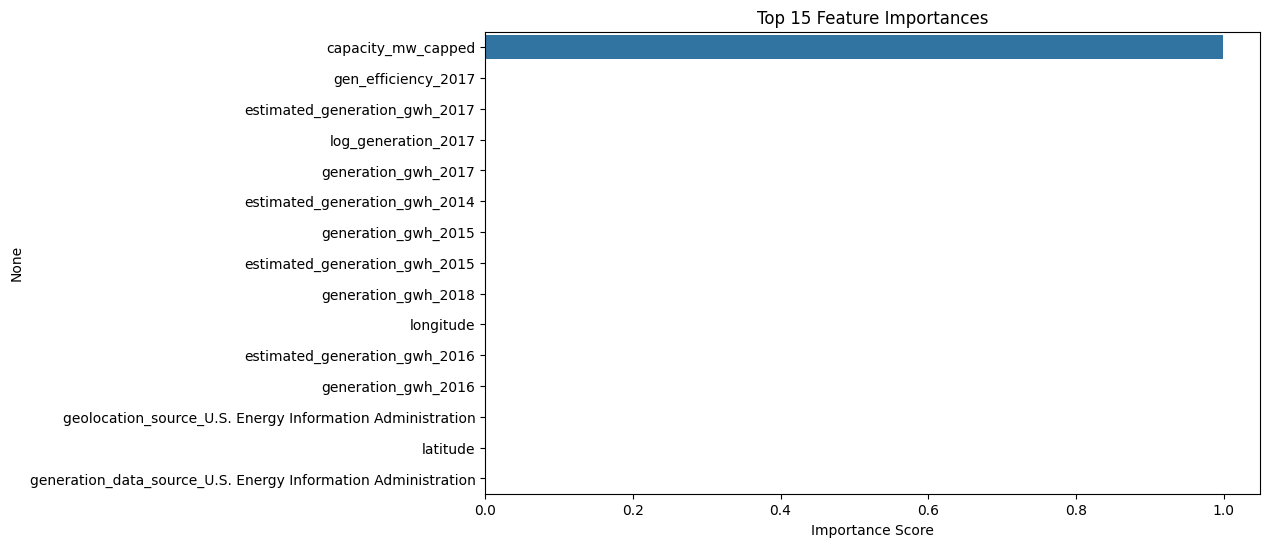

In [130]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


Define Evaluation Metrics

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")

Train Baseline Models


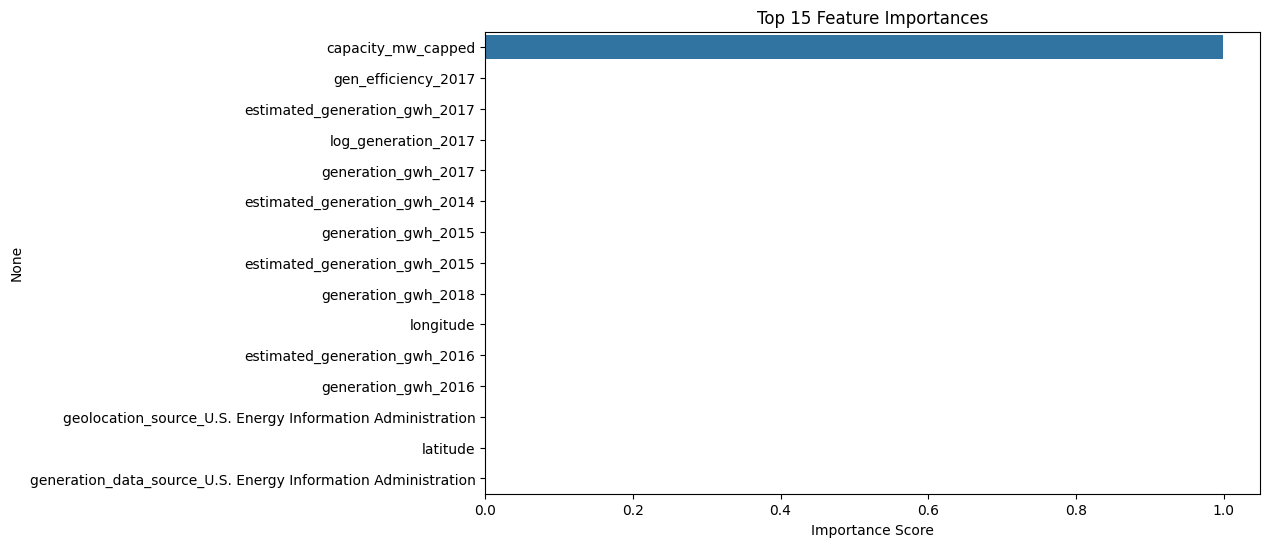

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


Linear Regression (simple baseline)

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression Performance:")
evaluate_model(y_test, lr_preds)


Linear Regression Performance:
MAE : 0.703
RMSE: 1.227
R²  : 0.556


Decision Tree Regressor

In [133]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

print("Decision Tree Performance:")
evaluate_model(y_test, tree_preds)


Decision Tree Performance:
MAE : 0.001
RMSE: 0.011
R²  : 1.000


 Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Performance:")
evaluate_model(y_test, rf_preds)


Random Forest Performance:
MAE : 0.001
RMSE: 0.013
R²  : 1.000


 XGBoost Regressor

In [135]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost Performance:")
evaluate_model(y_test, xgb_preds)


XGBoost Performance:
MAE : 0.008
RMSE: 0.020
R²  : 1.000


Visual Compare Predictions vs True

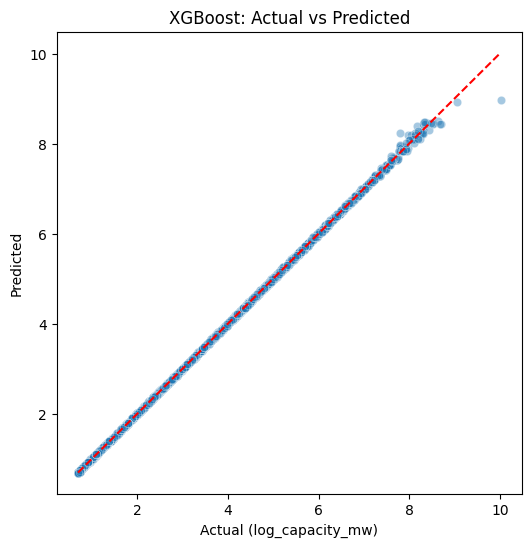

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.4)
plt.xlabel("Actual (log_capacity_mw)")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


Hyperparameter Tuning

 Random Forest Tuning

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  
}

# Create base model
rf_model = RandomForestRegressor(random_state=42)

# Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


XGBoost Tuning

In [138]:
from xgboost import XGBRegressor

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
xgb_search.fit(X_train, y_train)

# Best model
best_xgb = xgb_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [141]:
best_rf 

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      random_state=42)

In [142]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

Final Evaluation + Error Analysis

 Evaluate Tuned Models on Test Data

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name='Model'):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"{model_name} Performance:")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")
    return preds

# Evaluate both models
rf_preds = evaluate_model(best_rf, X_test, y_test, 'Tuned Random Forest')
xgb_preds = evaluate_model(best_xgb, X_test, y_test, 'Tuned XGBoost')


Tuned Random Forest Performance:
MAE : 0.064
RMSE: 0.129
R²  : 0.995
Tuned XGBoost Performance:
MAE : 0.008
RMSE: 0.019
R²  : 1.000


Error Analysis 

In [144]:
import pandas as pd

error_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Pred': rf_preds,
    'XGB_Pred': xgb_preds
})

error_df['RF_Error'] = abs(error_df['Actual'] - error_df['RF_Pred'])
error_df['XGB_Error'] = abs(error_df['Actual'] - error_df['XGB_Pred'])

# Top 10 largest errors
error_df.sort_values(by='XGB_Error', ascending=False).head(10)


,Actual,RF_Pred,XGB_Pred,RF_Error,XGB_Error
8453,10.021315,7.617936,9.049305,2.403379,0.972010
21926,8.699681,8.131243,8.402010,0.568439,0.297671
30728,7.800040,7.120022,8.046489,0.680018,0.246449
1043,7.976252,7.637041,8.205277,0.339211,0.229025
20051,8.682877,8.313751,8.469859,0.369126,0.213018
21414,8.343078,7.937485,8.526983,0.405592,0.183905
3272,9.052048,8.282351,8.898351,0.769697,0.153697
19550,8.243019,7.668507,8.090978,0.574513,0.152042
14929,8.438366,8.055603,8.294456,0.382763,0.143910
20071,8.051341,8.151355,8.193574,0.100014,0.142233


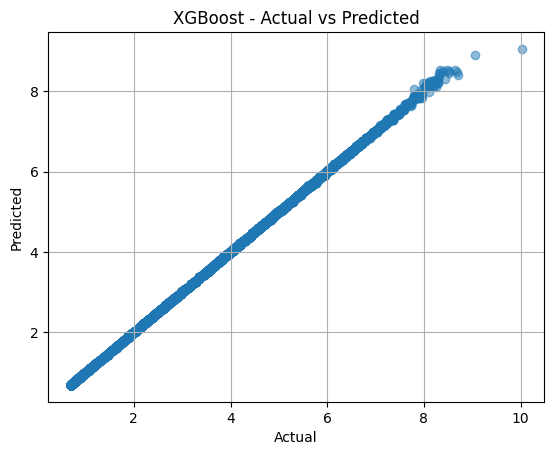

In [145]:
import matplotlib.pyplot as plt

plt.scatter(y_test, xgb_preds, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost - Actual vs Predicted")
plt.grid(True)
plt.show()


In [147]:
import joblib

# Save the model and the scaler (if you used one)
joblib.dump(best_xgb, "model/xgb_plant_generation_model.pkl")


['model/xgb_plant_generation_model.pkl']

In [148]:
# Save the list of features used
import joblib

features = X_train.columns.tolist()
joblib.dump(features, "model/feature_list.pkl")


['model/feature_list.pkl']